### Wolf Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
# create data folder if it does not exist
import os
if not os.path.exists('data'):
    os.makedirs('data')

#### Initialization

In [29]:
def init_state_2d(N, random = True):
    """
    Initialize a 2D state with N x N spins.
    If random is True, spins are assigned randomly to +1 or -1.
    If random is False, all spins are initialized to +1.
    """
    if random:
        state = np.random.choice([-1, 1], size=(N, N))
    else:
        state = np.ones((N, N), dtype=int)
    return state

In [30]:
def wolf_update(state, beta, J):
    """
    Perform a single Wolf cluster update on the given 2D state.
    """
    N = state.shape[0]
    # Choose a random seed spin
    x, y = np.random.randint(0, N, size=2)
    cluster_spin = state[x, y]
    
    # Initialize cluster
    cluster = set()
    cluster.add((x, y))
    
    # Stack for depth-first search
    stack = [(x, y)]
    
    while stack:
        i, j = stack.pop()
        
        # Check neighbors
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ni, nj = (i + di) % N, (j + dj) % N  # Periodic boundary conditions
            if (ni, nj) not in cluster and state[ni, nj] == cluster_spin:
                # Calculate bond formation probability
                p_add = 1 - np.exp(-2 * beta * J)
                if np.random.rand() < p_add:
                    cluster.add((ni, nj))
                    stack.append((ni, nj))
    
    # Flip the spins in the cluster
    for i, j in cluster:
        state[i, j] *= -1
    
    return state

In [ ]:
def simulate_wolf(N, beta, J, n_steps, random_init=True):
    """
    Simulate the 2D Ising model using the Wolf algorithm.
    """
    state = init_state_2d(N, random=random_init)
    states = [state.copy()]

    energys = []
    magnetizations = []
    
    for step in tqdm(range(n_steps)):
        state = wolf_update(state, beta, J)
        states.append(state.copy())

        # Save energy or magnetization
        energy = -J * np.sum(state * np.roll(state, 1, axis=0)) - J * np.sum(state * np.roll(state, 1, axis=1))
        magnetization = np.mean(state)
        energys.append(energy)
        magnetizations.append(magnetization)
        # print(f"Step {step}: Energy = {energy}, Magnetization = {magnetization}")
        
    plt.title(f"Step {step}")
    plot_state(state, step)

    return states, energys, magnetizations

def plot_state(state, step):
    plt.imshow(state, cmap='gray', vmin=-1, vmax=1)
    plt.axis('off')
    plt.show()

In [32]:
def plot_results(energys, magnetizations):
    """
    Plot energy and magnetization over simulation steps.
    """
    # plot magnetization and energy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(energys)
    plt.title('Energy vs Steps')
    plt.xlabel('Steps')
    plt.ylabel('Energy')
    plt.subplot(1, 2, 2)
    plt.plot(magnetizations)
    plt.title('Magnetization vs Steps')
    plt.xlabel('Steps')
    plt.ylabel('Magnetization')
    plt.tight_layout()
    plt.show()

100%|██████████| 10000/10000 [00:06<00:00, 1576.81it/s]


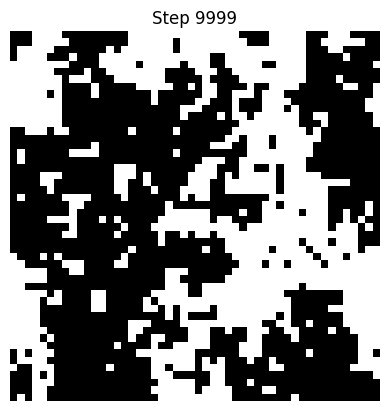

In [33]:
J = 1.0     # Interaction strength
N = 50      # Lattice size
n_steps = 10_000  # Number of simulation steps
beta = 0.4  # Inverse temperature
states, energys, magnetizations = simulate_wolf(N, beta, J, n_steps, random_init=True)


## Simulation run

Simulating for beta = 0.1


100%|██████████| 100000/100000 [00:37<00:00, 2636.82it/s]


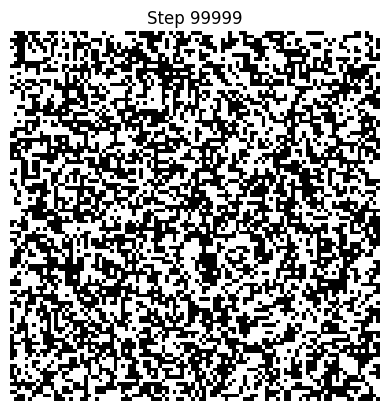

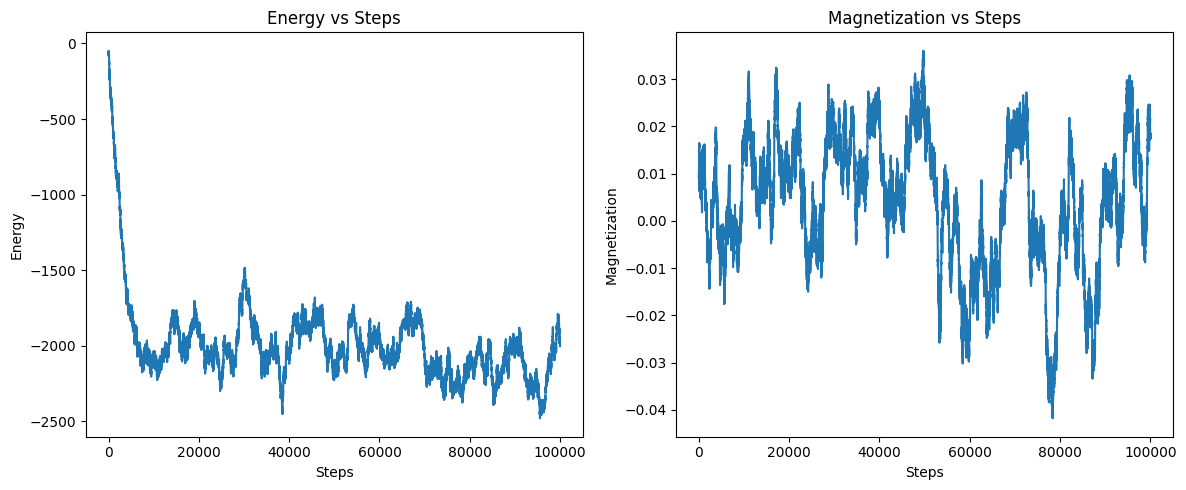

Simulating for beta = 0.2


100%|██████████| 100000/100000 [00:54<00:00, 1838.48it/s]


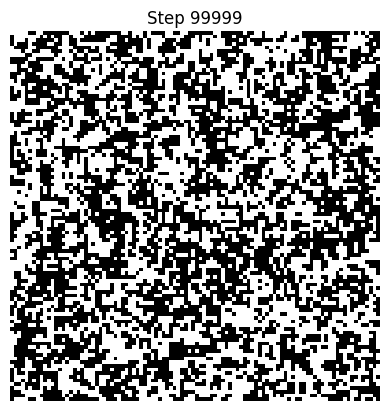

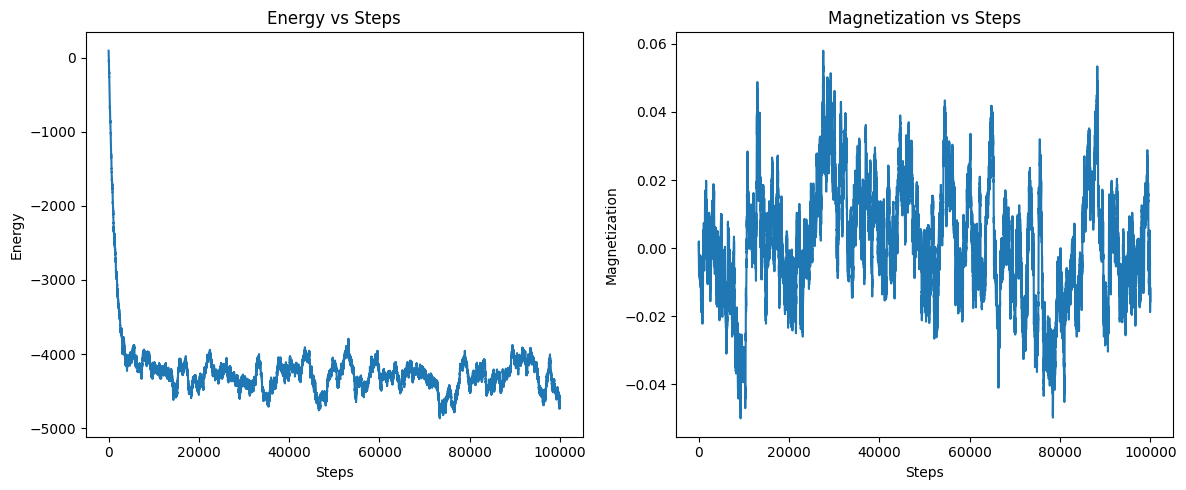

Simulating for beta = 0.3


100%|██████████| 100000/100000 [01:10<00:00, 1427.76it/s]


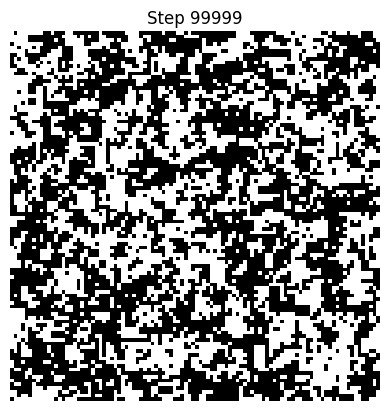

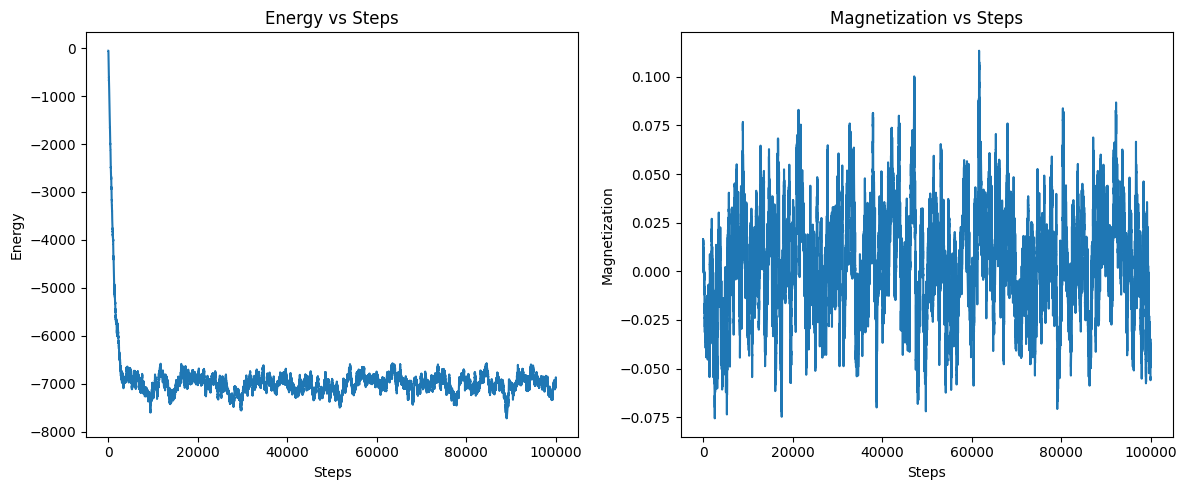

Simulating for beta = 0.4


100%|██████████| 100000/100000 [02:13<00:00, 750.85it/s]


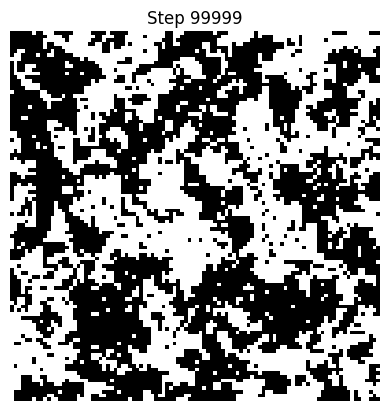

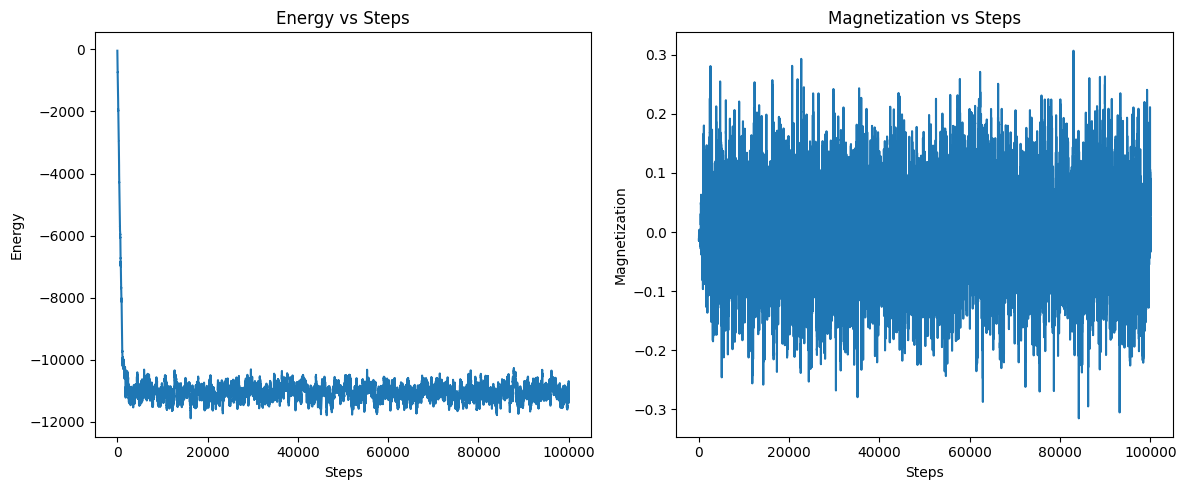

Simulating for beta = 0.41


100%|██████████| 100000/100000 [03:06<00:00, 535.72it/s]


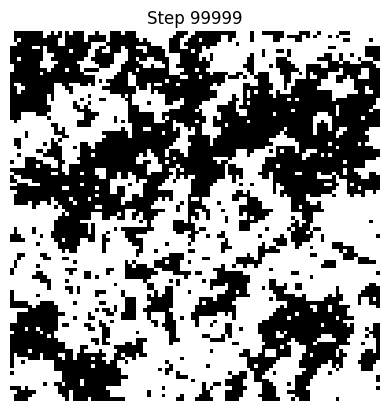

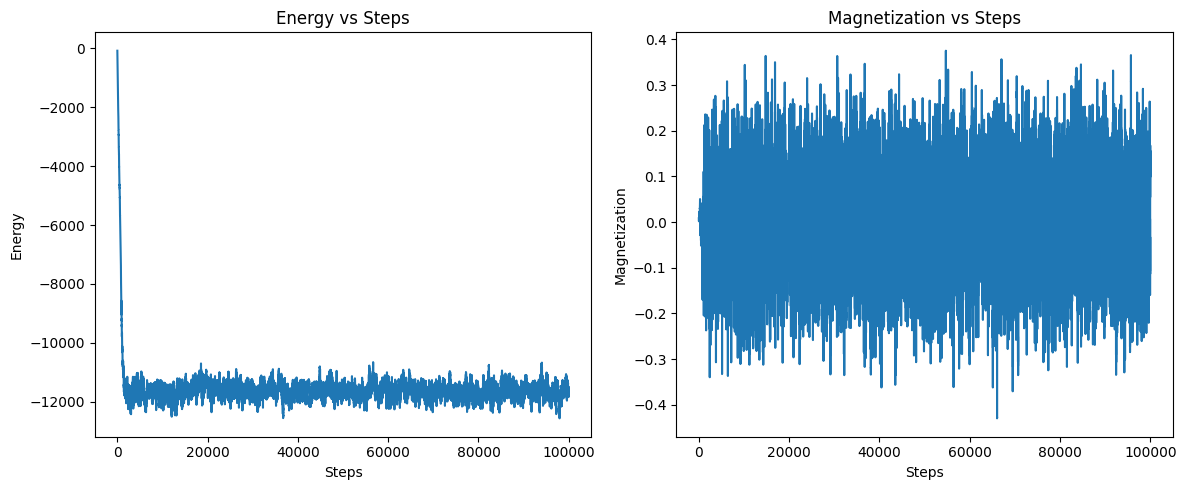

Simulating for beta = 0.42


100%|██████████| 100000/100000 [03:57<00:00, 420.39it/s]


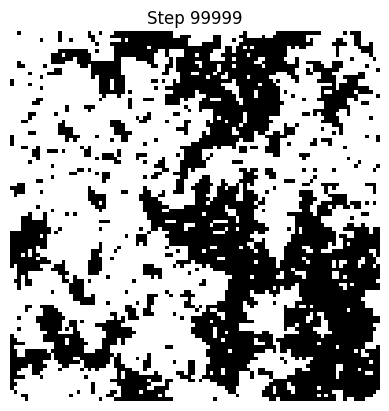

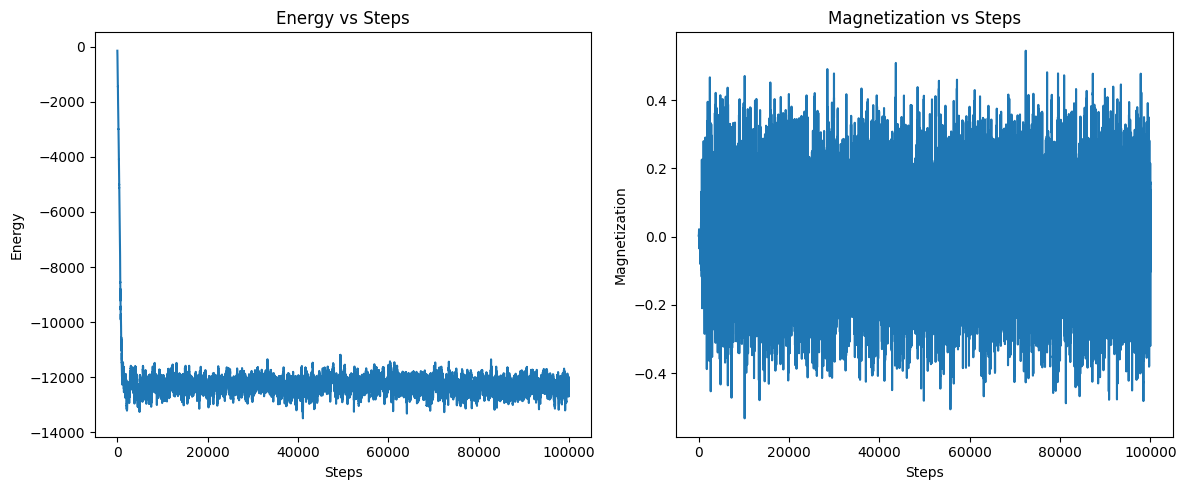

Simulating for beta = 0.43


100%|██████████| 100000/100000 [08:27<00:00, 197.23it/s]


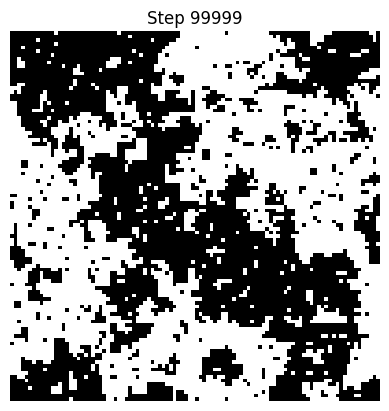

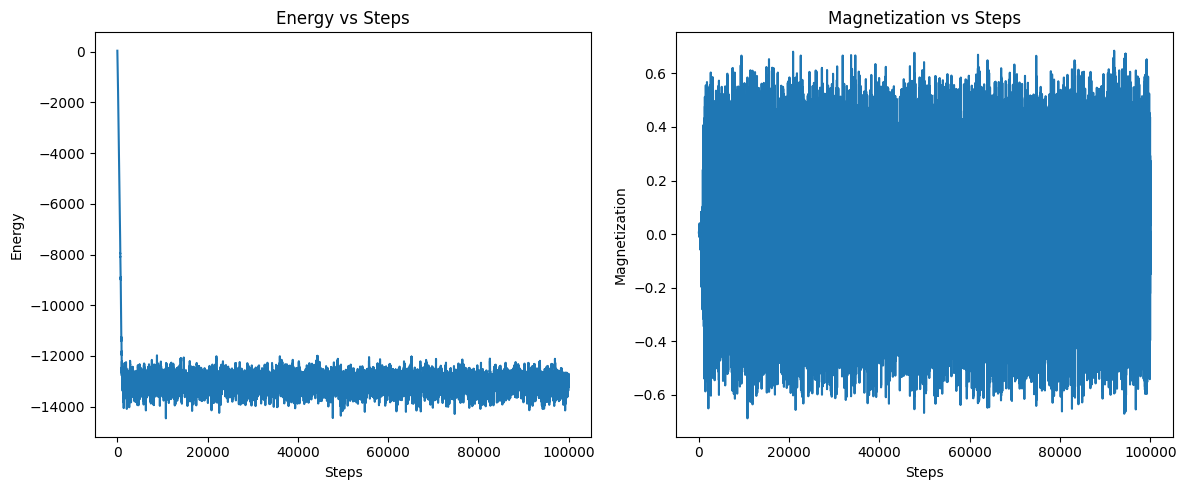

Simulating for beta = 0.44


100%|██████████| 100000/100000 [41:09<00:00, 40.50it/s] 


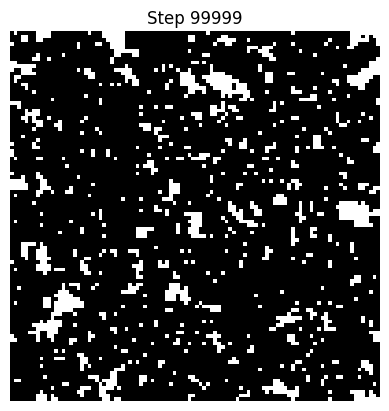

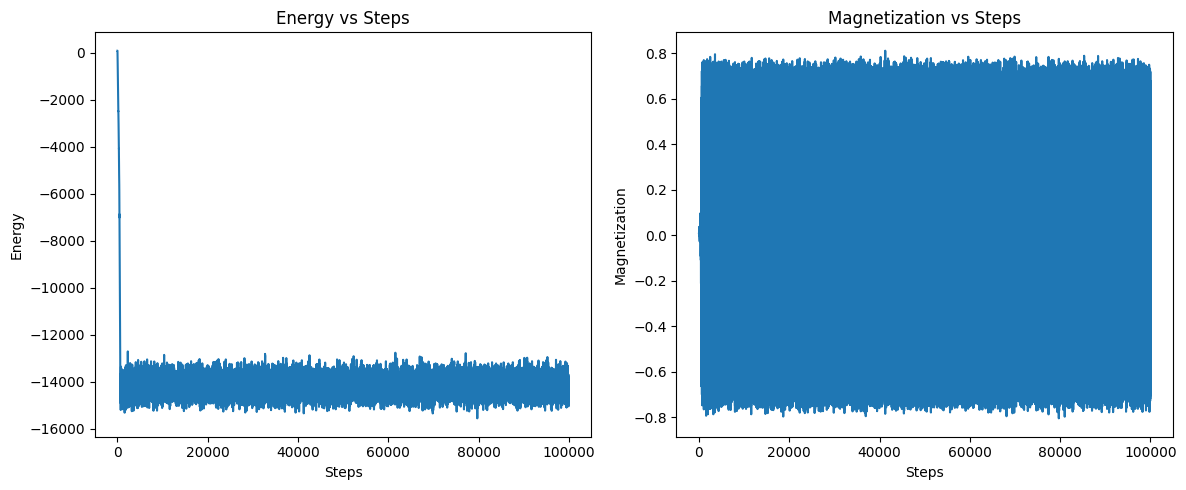

Simulating for beta = 0.4407


100%|██████████| 100000/100000 [46:09<00:00, 36.11it/s] 


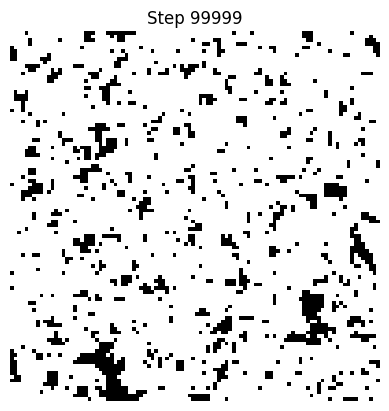

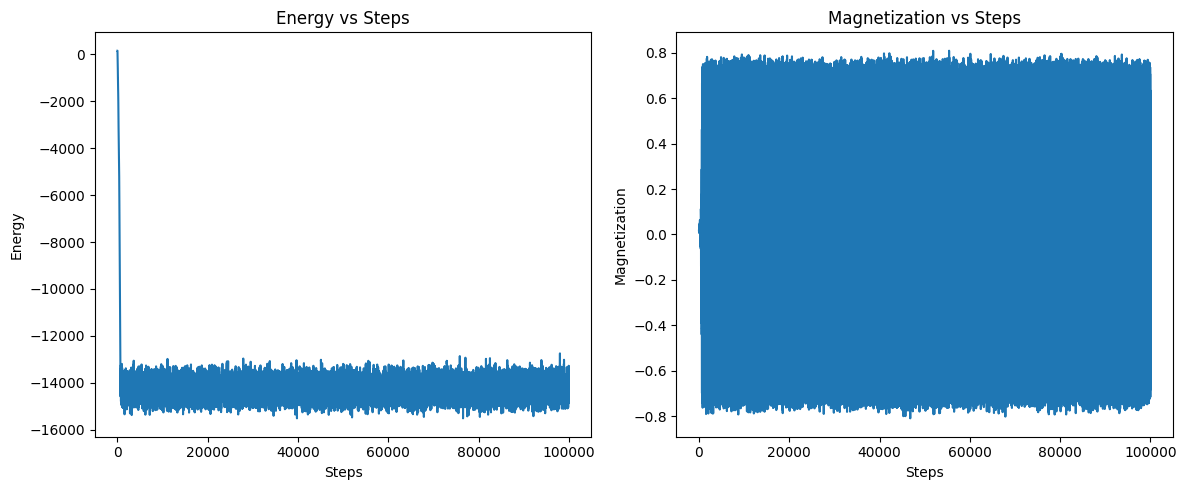

Simulating for beta = 0.45


100%|██████████| 100000/100000 [1:11:52<00:00, 23.19it/s]


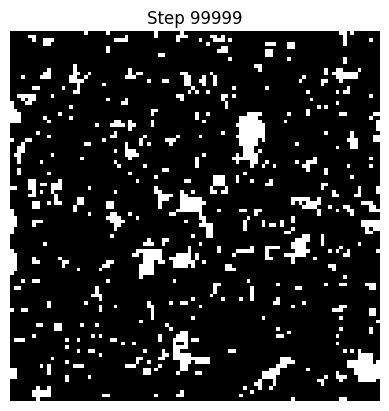

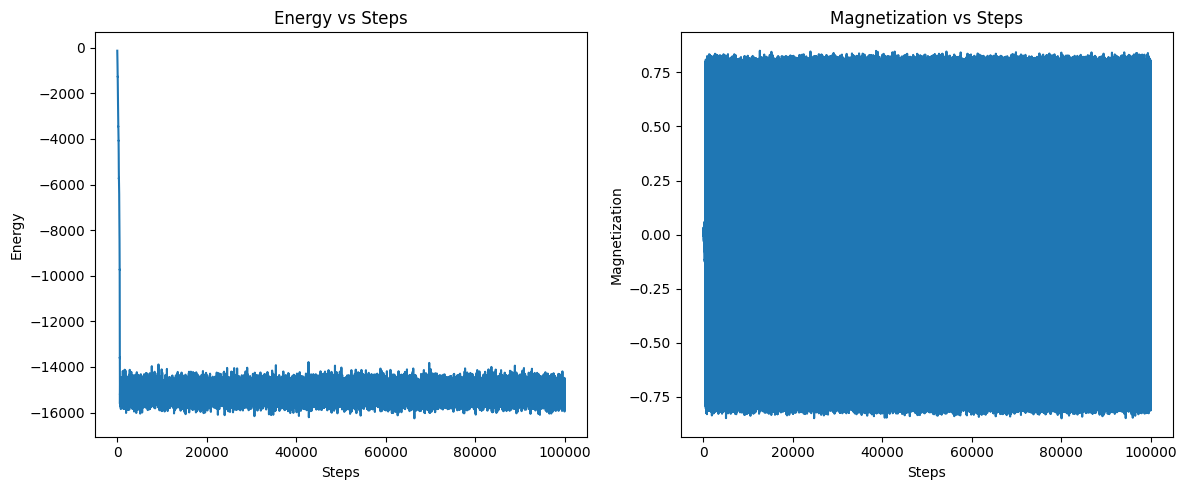

Simulating for beta = 0.46


100%|██████████| 100000/100000 [1:24:01<00:00, 19.83it/s]


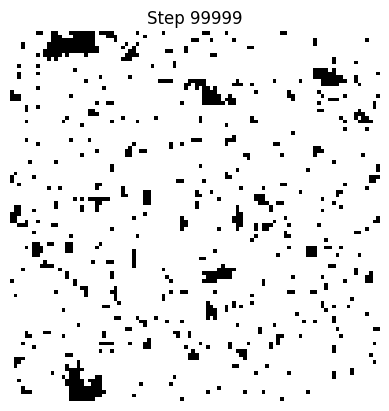

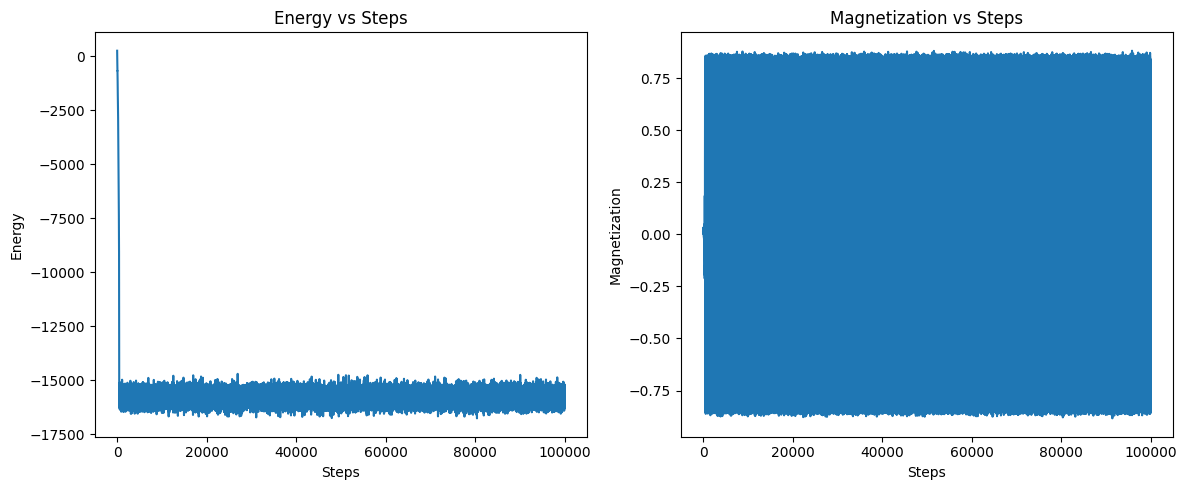

Simulating for beta = 0.47


100%|██████████| 100000/100000 [1:31:31<00:00, 18.21it/s]


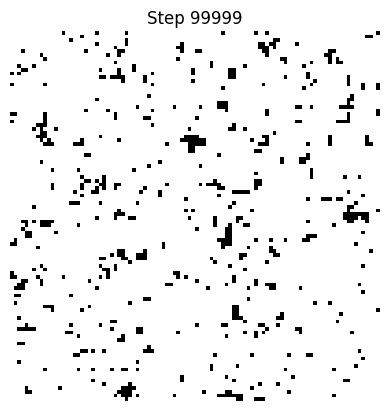

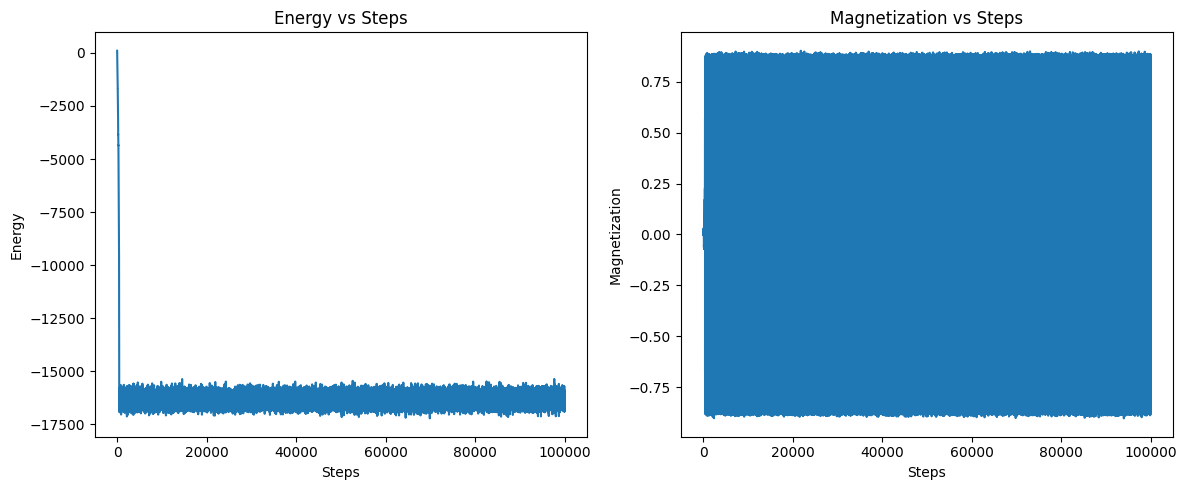

Simulating for beta = 0.48


100%|██████████| 100000/100000 [1:36:12<00:00, 17.32it/s] 


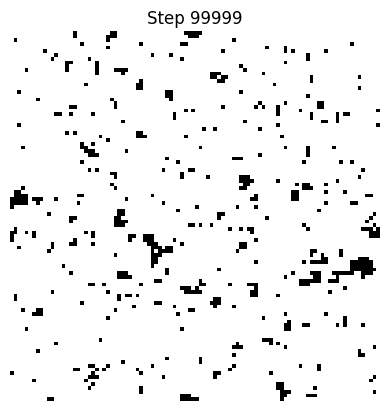

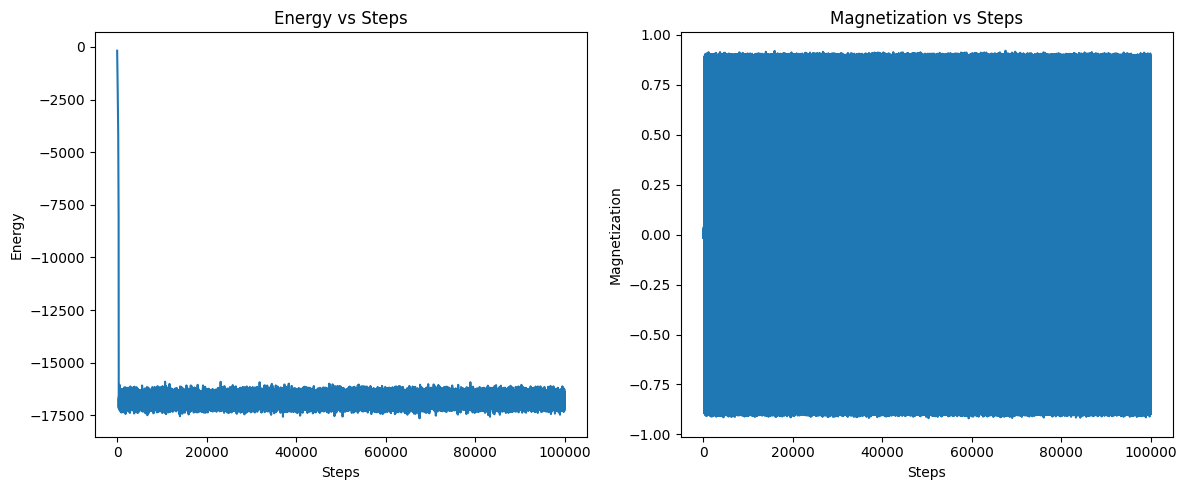

Simulating for beta = 0.49


100%|██████████| 100000/100000 [1:39:56<00:00, 16.68it/s] 


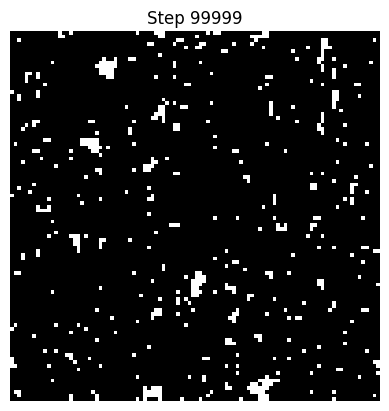

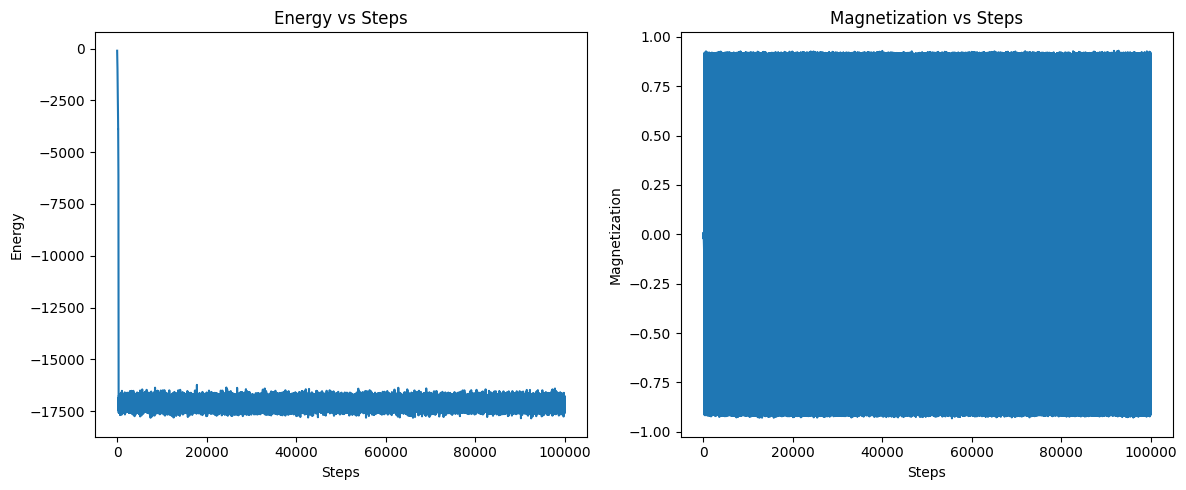

Simulating for beta = 0.5


100%|██████████| 100000/100000 [1:42:42<00:00, 16.23it/s] 


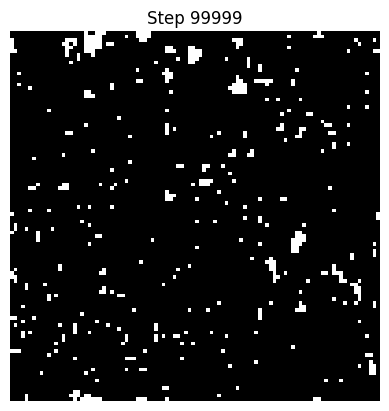

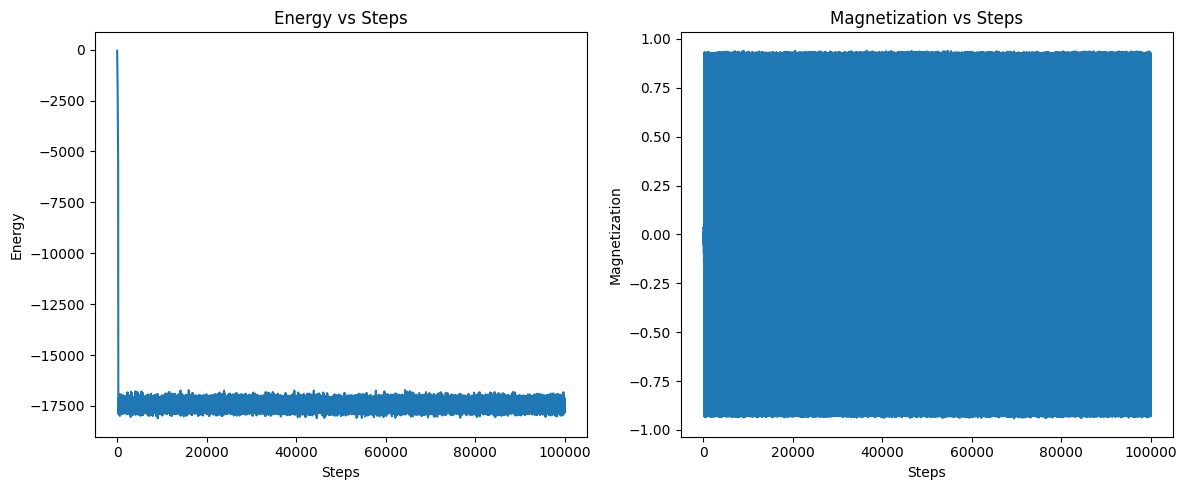

Simulating for beta = 0.6


100%|██████████| 100000/100000 [1:49:05<00:00, 15.28it/s] 


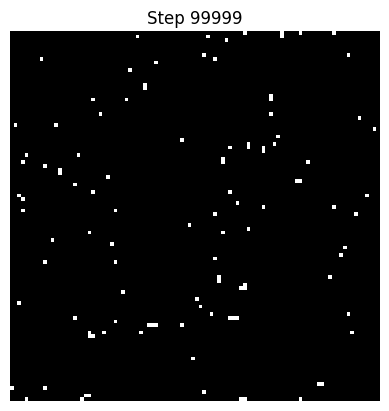

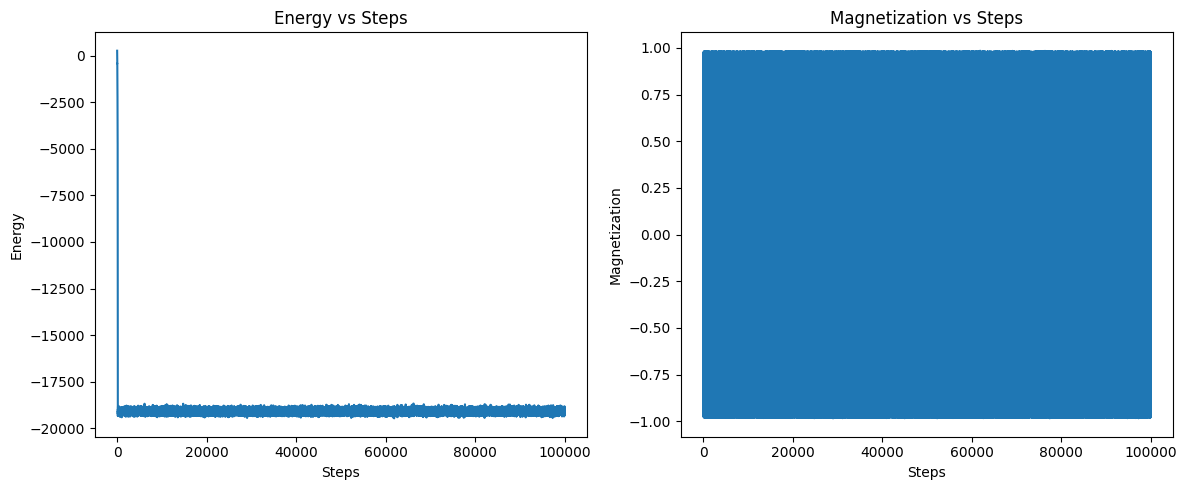

In [37]:
T_c = 2.269  # Critical temperature for 2D Ising model
beta_c = 1 / T_c # = 0.4407

# run definition
run = "wolf_temperature_v2"

#folder creation
if not os.path.exists(f'data/{run}'):
    os.makedirs(f'data/{run}')

# print(beta_c)
J = 1.0     # Interaction strength
N = 100      # Lattice size
n_steps = 100_000  # Number of simulation steps

#save textfile with parameters and run info
with open(f"data/{run}/_parameters.txt", "w") as f:
    f.write(f"Run: {run}\n")
    f.write(f"Lattice size: {N}x{N}\n")
    f.write(f"Interaction strength J: {J}\n")
    f.write(f"Number of steps: {n_steps}\n")
    f.write(f"Output files: data/{run}_beta_*.npz\n")
    f.write(f"Data: states, energys, magnetizations\n")

beta_ls = [0.1,0.2, 0.3, 0.4, 0.41, 0.42, 0.43, 0.44, 0.4407, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.6]
#save beta list to textfile

with open(f"data/{run}/beta_list.txt", "w") as f:
    for beta in beta_ls:
        f.write(f"{beta}\n")

for beta in beta_ls:
    print(f"Simulating for beta = {beta}")
    states, energys, magnetizations = simulate_wolf(N, beta, J, n_steps, random_init=True)
    # save data
    np.savez(f"data/{run}/mag_eng_beta_{beta}.npz", energys=energys, magnetizations=magnetizations)
    plot_results(energys, magnetizations)

In [ ]:
with open(f"data/{run}_beta_list.txt", "w") as f:
    for beta in beta_ls:
        f.write(f"{beta}\n")